### Reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

seed = 42

In [40]:
df = pd.read_excel('D:\\nettech\\MyLearningNotebooks\\mylearningnotebooks\\datasets\\Income Classification.xlsx')
df.head()
df_test = pd.read_excel('D:\\nettech\MyLearningNotebooks\\mylearningnotebooks\\datasets\\Income Classification Test Set.xlsx')

In [41]:
df.shape

(34189, 15)

- `age`: Age of the individual.
- `workclass`: Working class of the individual.
- `fnlwgt`: Final weight. (Not clear without context)
- `education`: Highest level of education achieved.
- `educational-num`: Number of education years completed.
- `marital-status`: Marital status of the individual.
- `occupation`: Occupation of the individual.
- `relationship`: Relationship status of the individual.
- `race`: Race of the individual.
- `gender`: Gender of the individual.
- `capital-gain`: Capital gains of the individual.
- `capital-loss`: Capital losses of the individual.
- `hours-per-week`: Number of hours worked per week.
- `native-country`: Native country of the individual.
- `income`: Income bracket of the individual. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              34189 non-null  int64 
 1   workclass        34189 non-null  object
 2   fnlwgt           34189 non-null  int64 
 3   education        34189 non-null  object
 4   educational-num  34189 non-null  int64 
 5   marital-status   34189 non-null  object
 6   occupation       34189 non-null  object
 7   relationship     34189 non-null  object
 8   race             34189 non-null  object
 9   gender           34189 non-null  object
 10  capital-gain     34189 non-null  int64 
 11  capital-loss     34189 non-null  int64 
 12  hours-per-week   34189 non-null  int64 
 13  native-country   34189 non-null  object
 14  income           34189 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,38.656527,1.898226e+05,10.074907,1073.664395,88.454035,40.404370
std,13.722446,1.058038e+05,2.561877,7401.945307,404.725769,12.412682
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177670e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783440e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.374520e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.describe(include = 'O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,34189,34189,34189,34189,34189,34189,34189,34189,34189
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,23698,11074,15556,4314,13694,29233,22875,30723,26002


In [42]:
# check null values
#df.isna().sum()
df_test.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [43]:
# check duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace = True, keep='first')

# duplicate values deleted

### EDA

In [11]:
categorical_cols = df.select_dtypes(include='O')
categorical_cols

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,>50K
1,Self-emp-not-inc,Masters,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
2,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
3,Private,Some-college,Never-married,Prof-specialty,Not-in-family,Black,Male,United-States,<=50K
4,Private,HS-grad,Separated,Other-service,Unmarried,Black,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
34184,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,>50K
34185,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,<=50K
34186,State-gov,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
34187,Private,Prof-school,Never-married,Exec-managerial,Not-in-family,White,Male,United-States,>50K


In [12]:
numerical_cols = df.select_dtypes(exclude = 'O')
numerical_cols

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,33,129707,13,0,0,60
1,46,98881,14,0,0,45
2,38,219546,13,0,0,40
3,30,243867,10,0,0,45
4,22,347530,9,0,0,35
...,...,...,...,...,...,...
34184,48,158924,9,0,0,40
34185,27,118799,9,0,0,40
34186,49,142856,9,0,0,40
34187,38,99233,15,0,0,40


In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Private,129707,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,>50K
1,46,Self-emp-not-inc,98881,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
2,38,Private,219546,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
3,30,Private,243867,Some-college,10,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,United-States,<=50K
4,22,Private,347530,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,35,United-States,<=50K


<AxesSubplot: xlabel='income', ylabel='count'>

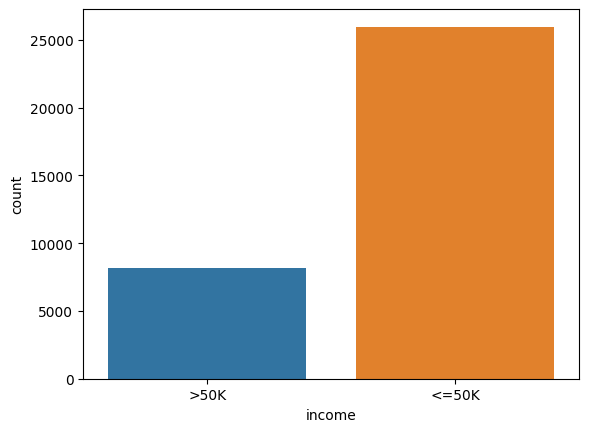

In [20]:
sns.countplot(x = 'income', data = df)

# dataset is imbalanced - need to use stratified k fold for crossvalidation

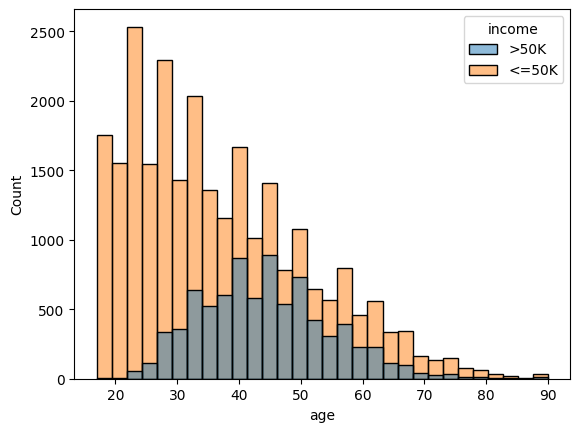

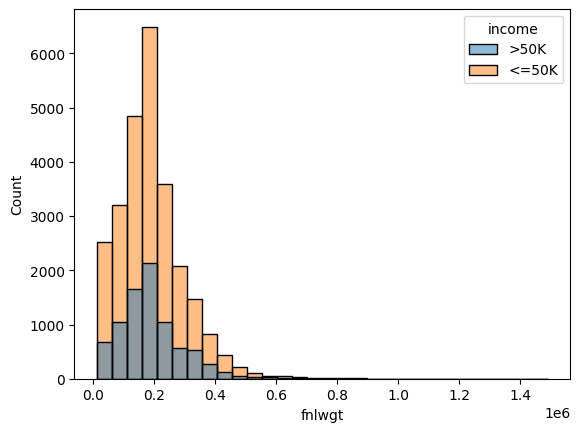

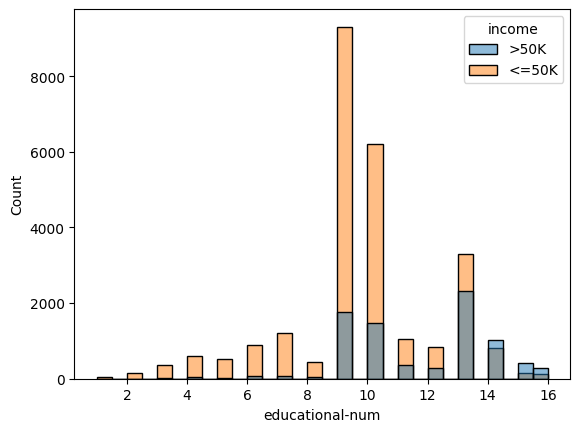

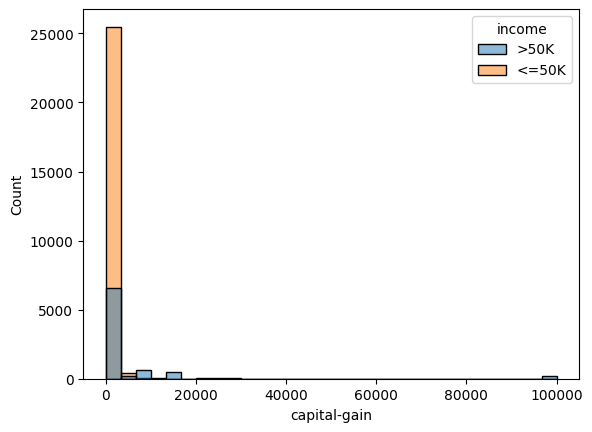

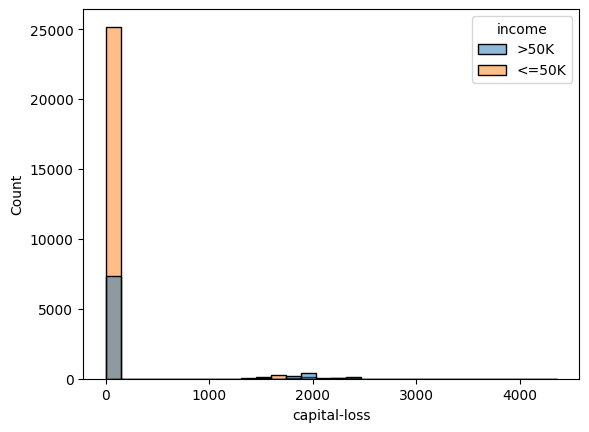

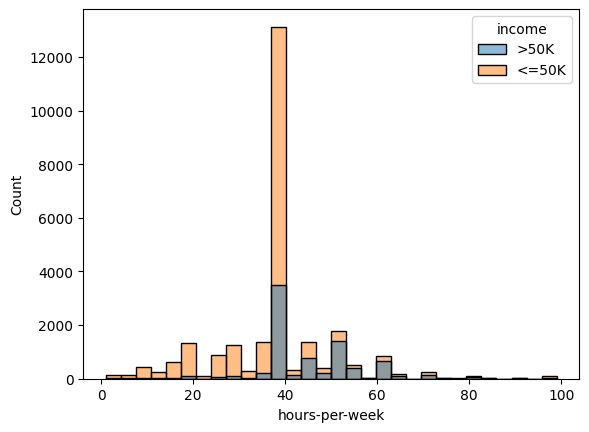

In [21]:
for i in numerical_cols:
    sns.histplot(data = df, x = i, bins = 30, hue = 'income')
    plt.show()

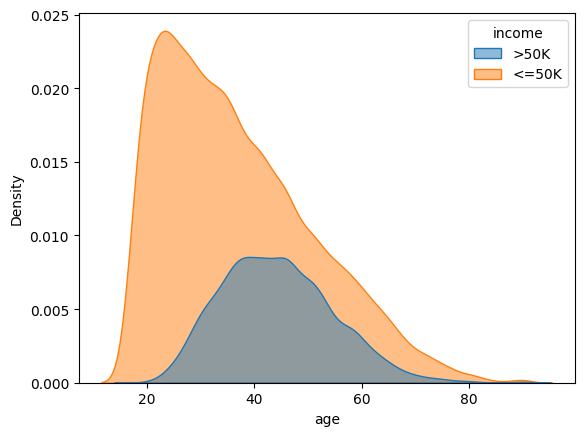

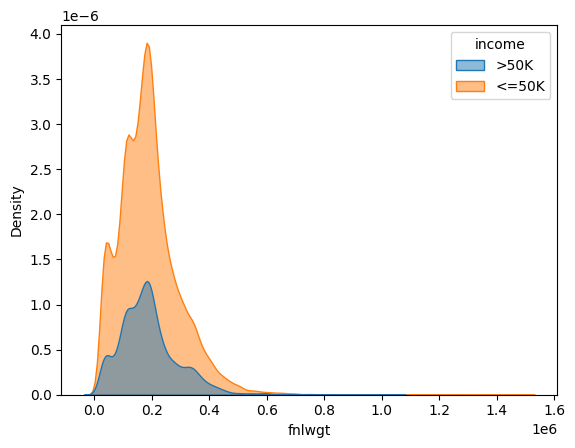

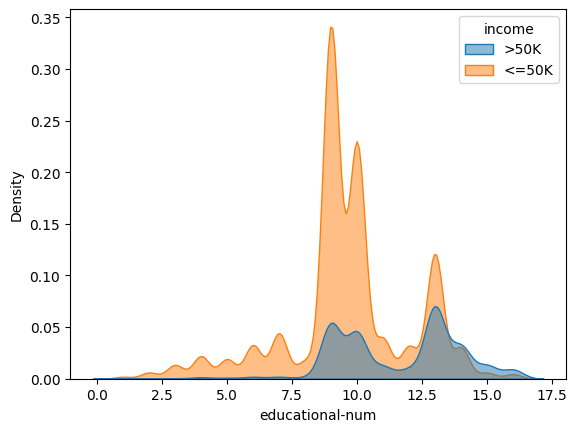

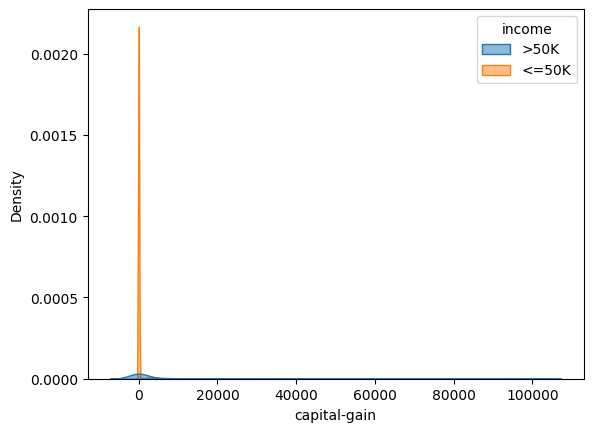

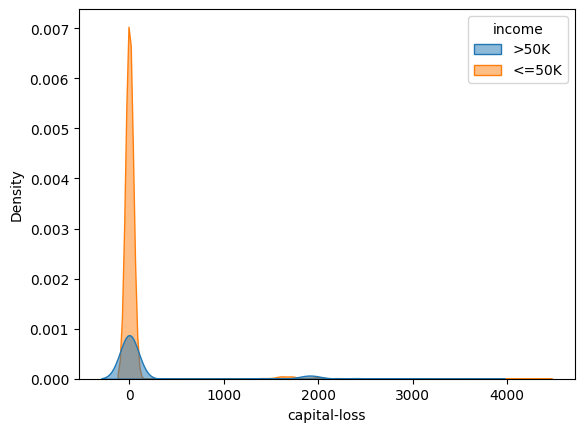

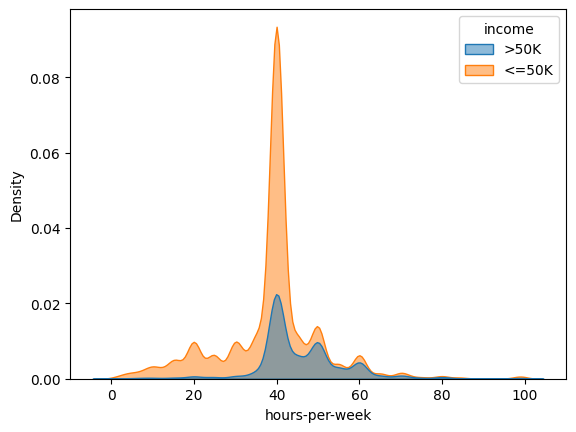

In [22]:
for i in numerical_cols:
    sns.kdeplot(data = df, x = i, hue = 'income', alpha = 0.5, fill = True)
    plt.show()

([<matplotlib.patches.Wedge at 0x207e2ccde40>,
 [Text(-0.8028591159894385, 0.7519423115323791, '<=50K'),
  Text(0.8028591159894384, -0.7519423115323792, '>50K')],
 [Text(-0.4379231541760573, 0.410150351744934, '76.04%'),
  Text(0.43792315417605726, -0.4101503517449341, '23.96%')])

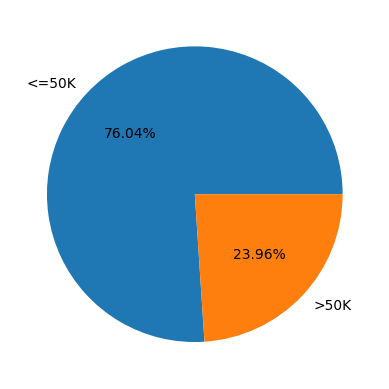

In [23]:
plt.pie(x = df['income'].value_counts(), labels = df['income'].value_counts().index , autopct = '%.2f%%')

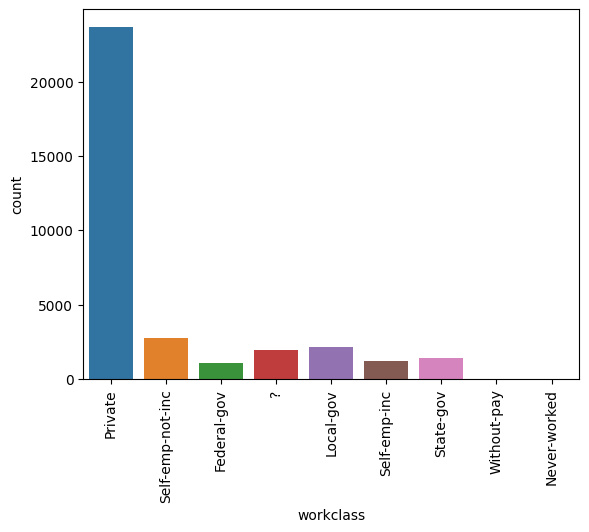

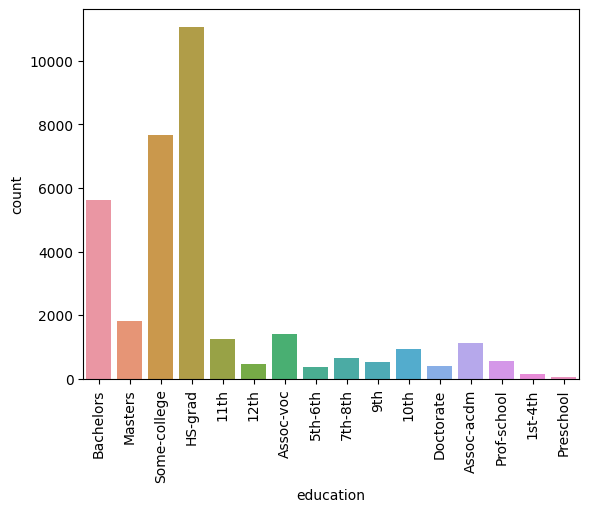

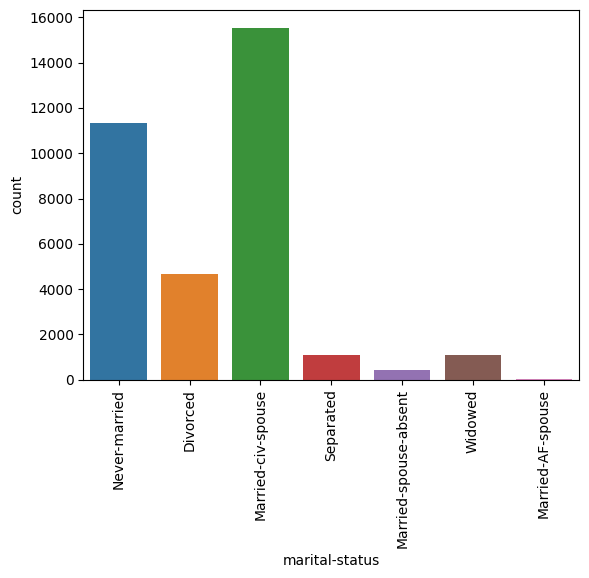

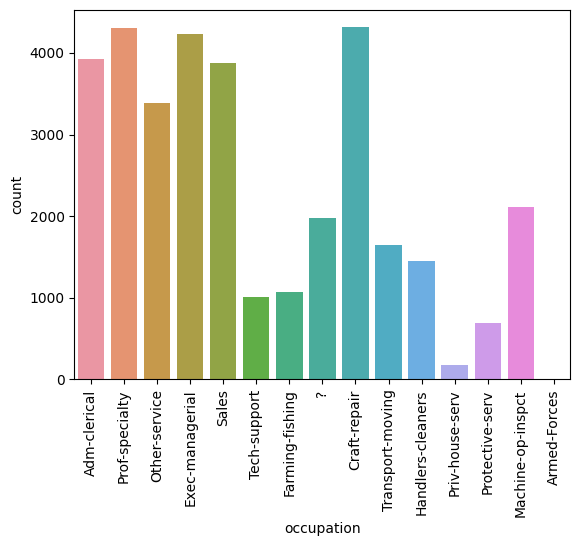

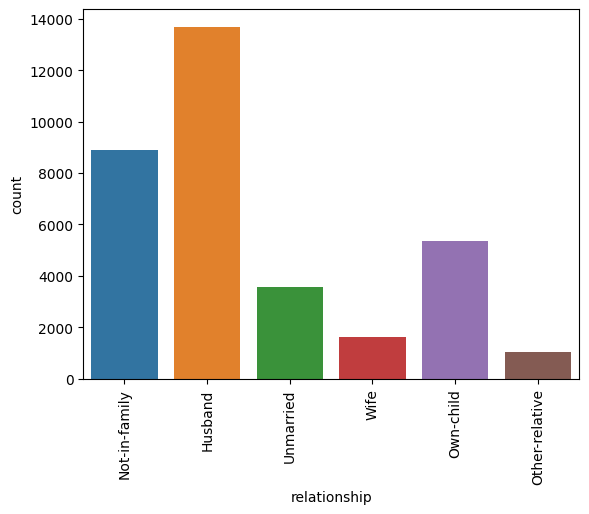

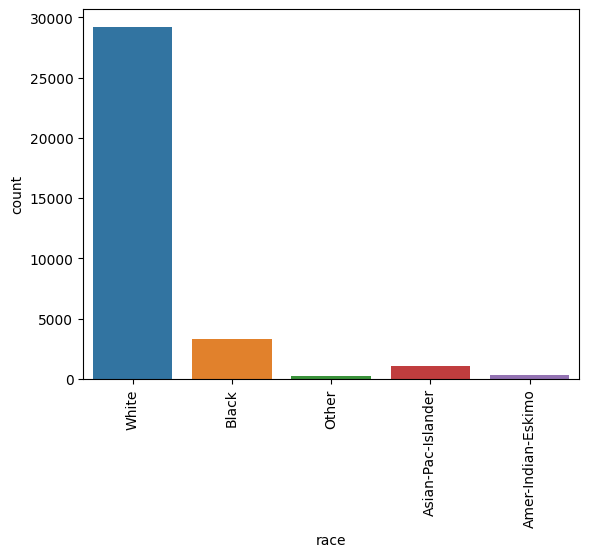

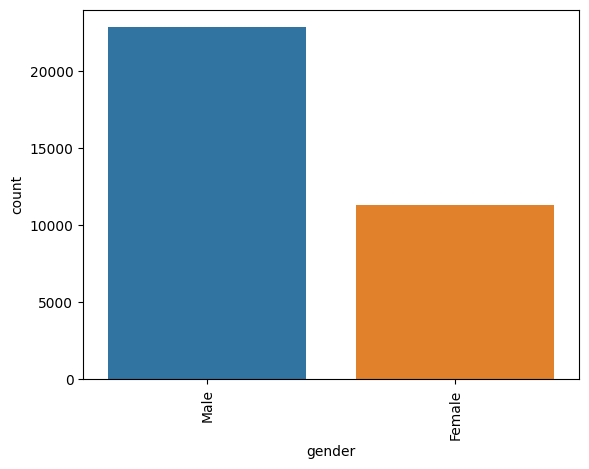

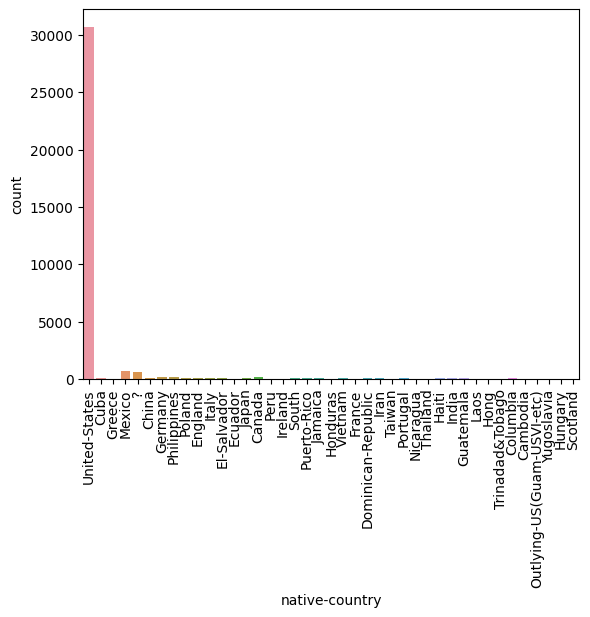

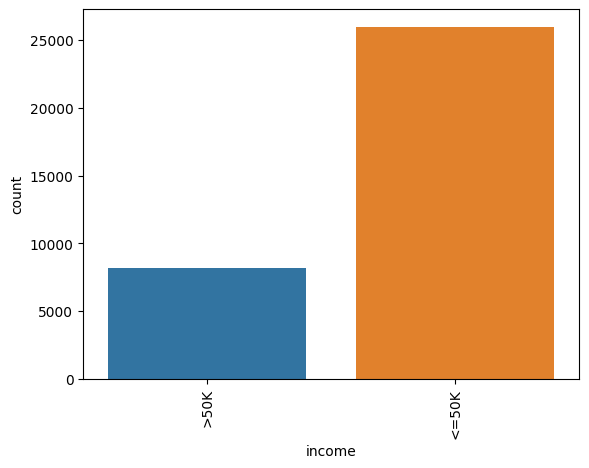

In [24]:
for i in categorical_cols:
    sns.countplot(data = df, x = i)
    plt.xticks(rotation=90)
    plt.show()

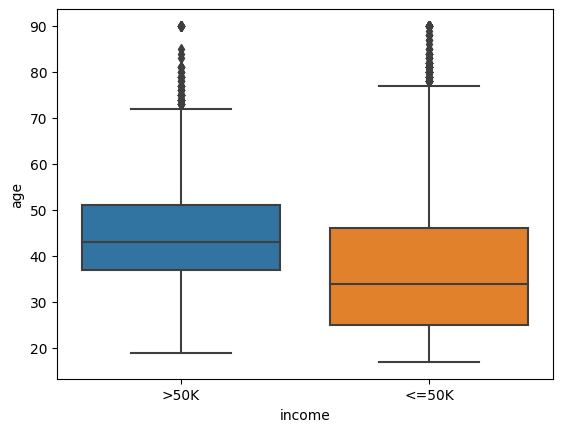

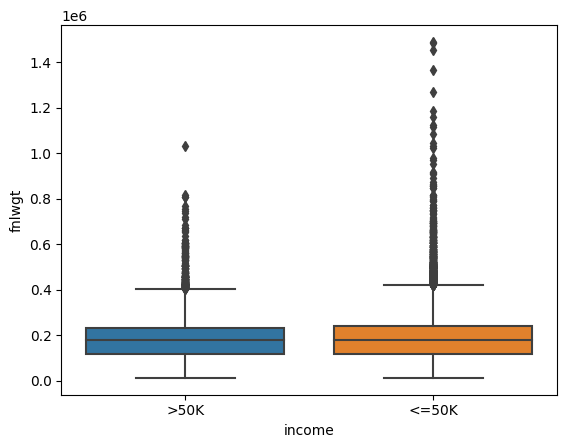

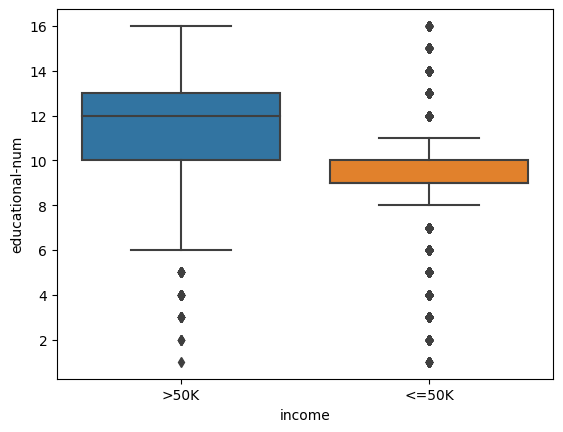

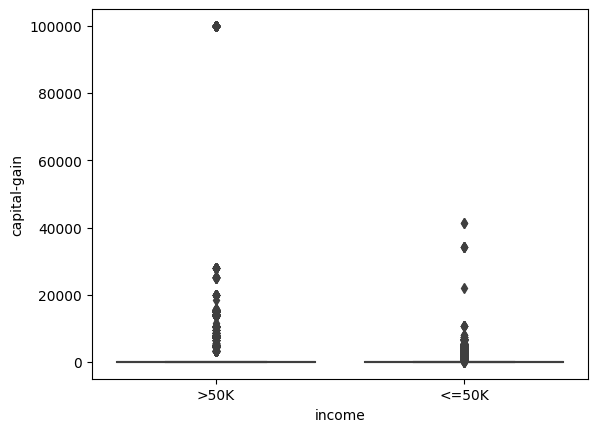

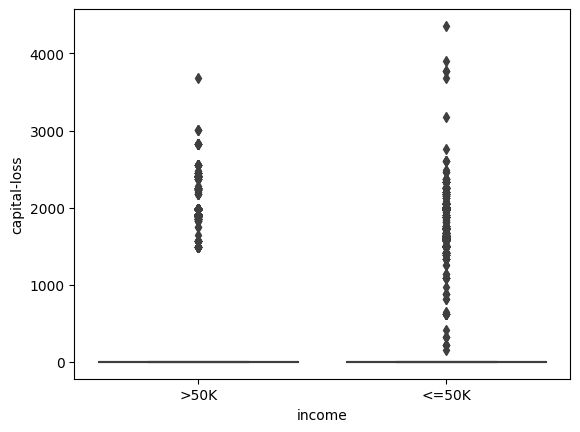

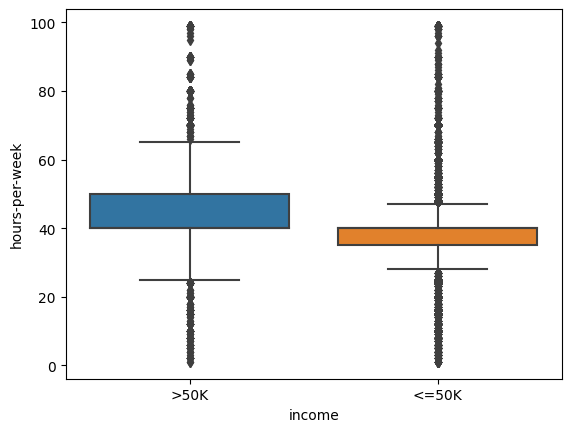

In [25]:
for i in numerical_cols:
    sns.boxplot(data = df, y = i, x = 'income')
    plt.show()

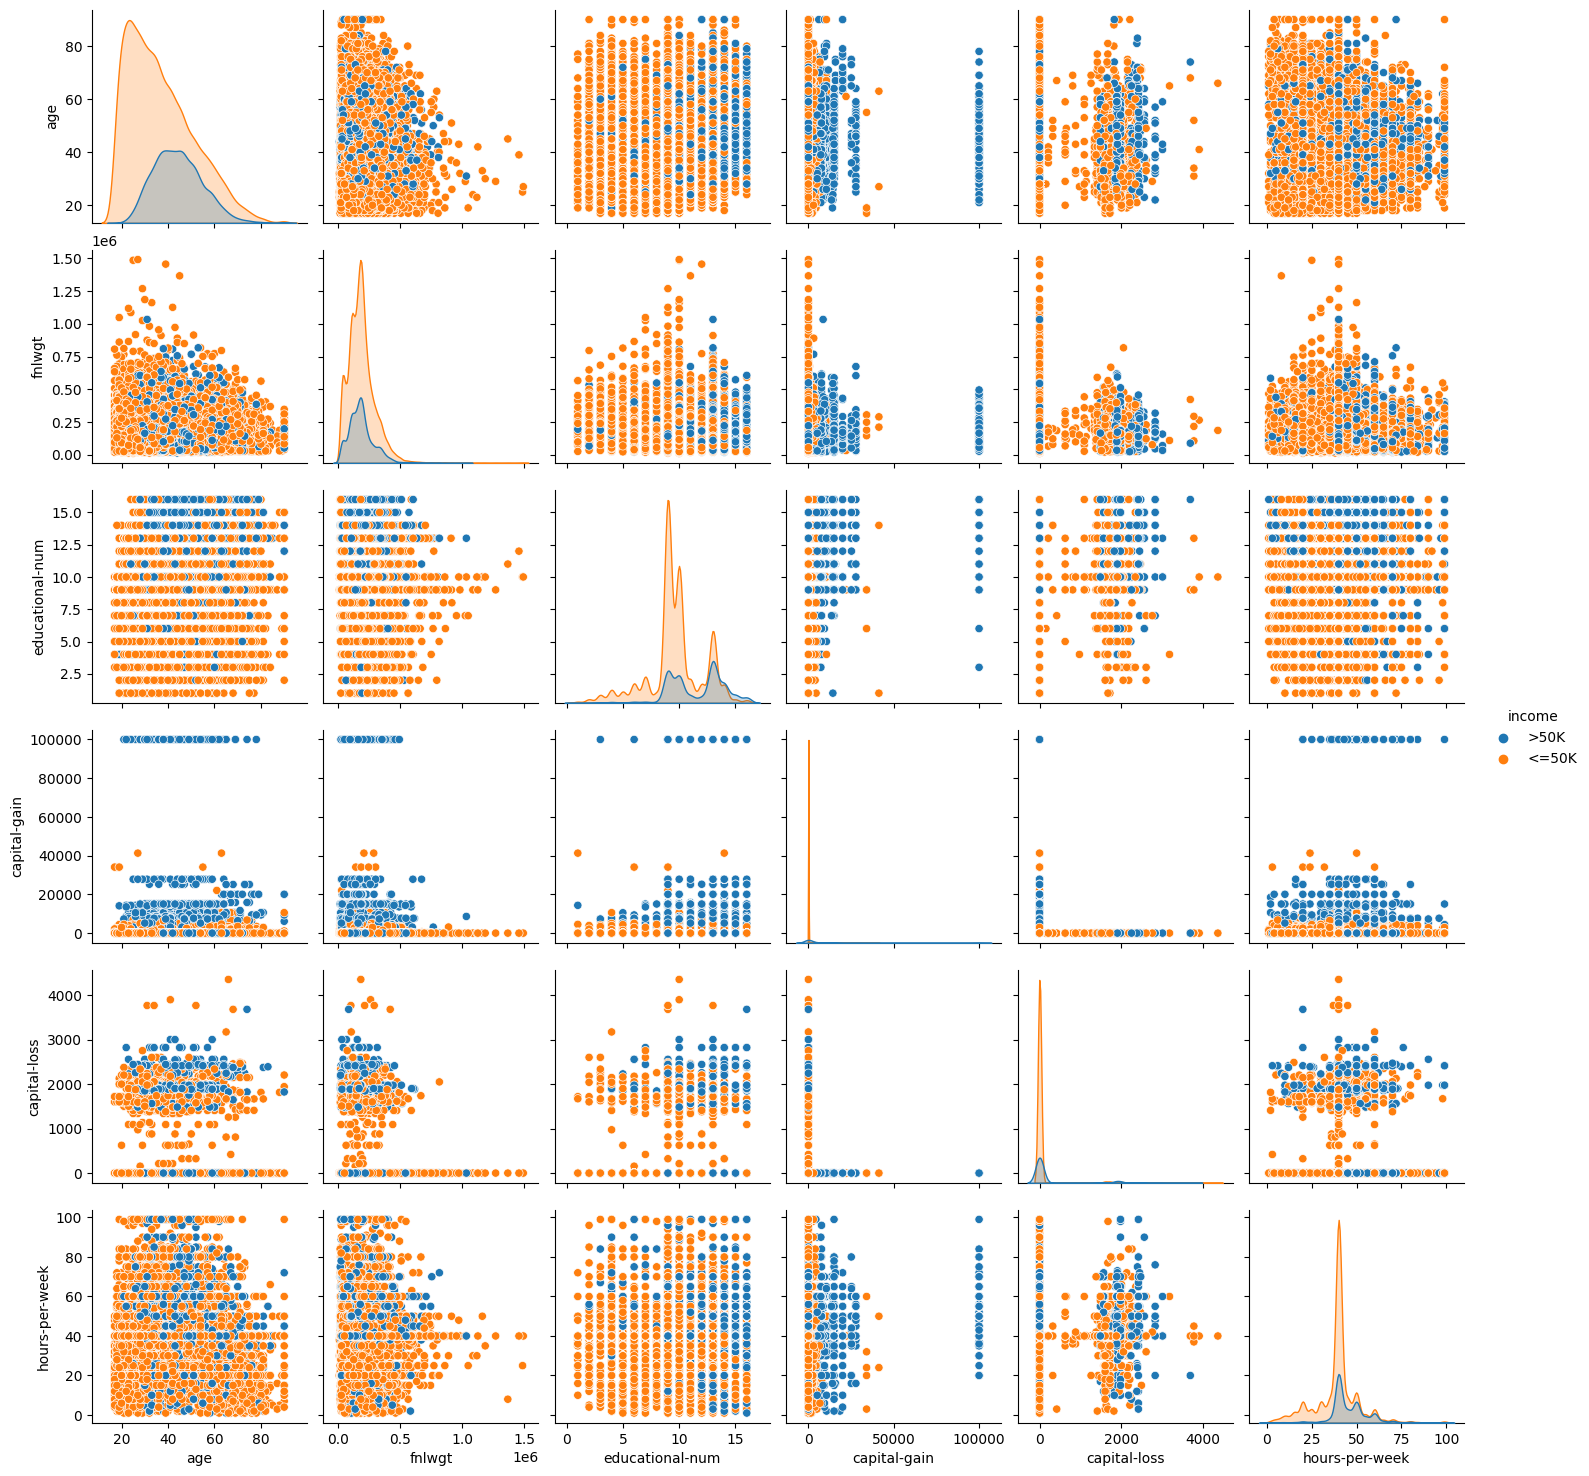

In [26]:
sns.pairplot(data = df, hue = 'income')

### Data preprocessing

In [44]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Private,129707,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,>50K
1,46,Self-emp-not-inc,98881,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
2,38,Private,219546,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
3,30,Private,243867,Some-college,10,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,United-States,<=50K
4,22,Private,347530,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,35,United-States,<=50K


In [45]:
df.describe(include = 'O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,34164,34164,34164,34164,34164,34164,34164,34164,34164
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,23678,11067,15551,4311,13689,29210,22859,30704,25979


In [46]:
df_test.describe(include = 'O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,14653,14653,14653,14653,14653,14653,14653,14653
unique,8,16,7,15,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,10143,4714,6718,1871,5881,12527,9752,13158


In [23]:
# We can observe that the test set workclass column has 8 unique values while the train set has 9 unique values
# We will have to add an extra column with value 0 in the test set as the model expects a column with 9 unique values (one hot encoder was used)

In [47]:
df['workclass'].value_counts()

Private             23678
Self-emp-not-inc     2736
Local-gov            2174
?                    1970
State-gov            1370
Self-emp-inc         1173
Federal-gov          1038
Without-pay            15
Never-worked           10
Name: workclass, dtype: int64

In [48]:
df_test['workclass'].value_counts()

Private             10143
Self-emp-not-inc     1167
Local-gov             941
?                     833
State-gov             568
Self-emp-inc          533
Federal-gov           463
Without-pay             5
Name: workclass, dtype: int64

In [49]:
# LabelEncode categorical columns where no of unique values are greater than 10
# OneHot encode for columns where no of unique values are less than 10

df.select_dtypes(include = 'O').nunique()
cols_greater_than_10 = df.select_dtypes(include = 'O').nunique()[df.select_dtypes(include = 'O').nunique() >= 10].index
cols_less_than_10 = df.select_dtypes(include='O').nunique()[df.select_dtypes(include='O').nunique() < 10].index

print(f'Cols with unique > 10 are : {[x for x in cols_greater_than_10]}')
print(f'Cols with unique < 10 are : {[x for x in cols_less_than_10]}')

cols_less_than_10_test = cols_less_than_10[:-1]

print(f'Cols with unique < 10 are : {[x for x in cols_less_than_10_test]}')


Cols with unique > 10 are : ['education', 'occupation', 'native-country']
Cols with unique < 10 are : ['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income']
Cols with unique < 10 are : ['workclass', 'marital-status', 'relationship', 'race', 'gender']


In [50]:
# labelencode columns with unique values > 10

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols_greater_than_10:
    df[col] = le.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Private,129707,9,13,Never-married,1,Not-in-family,White,Male,0,0,60,38,>50K
1,46,Self-emp-not-inc,98881,12,14,Divorced,10,Not-in-family,White,Female,0,0,45,38,<=50K
2,38,Private,219546,9,13,Married-civ-spouse,10,Husband,White,Male,0,0,40,38,>50K
3,30,Private,243867,15,10,Never-married,10,Not-in-family,Black,Male,0,0,45,38,<=50K
4,22,Private,347530,11,9,Separated,8,Unmarried,Black,Female,0,0,35,38,<=50K


In [51]:
# labelencode Test set columns with unique values > 10

for col in cols_greater_than_10:
    df_test[col] = le.fit_transform(df_test[col])

df_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,34,Private,176711,11,9,Never-married,1,Own-child,White,Male,0,0,40,38
1,71,Self-emp-inc,133821,11,9,Married-civ-spouse,1,Wife,White,Female,0,0,20,38
2,31,Local-gov,190228,12,14,Never-married,4,Not-in-family,White,Male,0,0,45,38
3,24,Private,104146,9,13,Never-married,10,Own-child,Asian-Pac-Islander,Male,0,0,40,38
4,32,Private,192039,8,11,Married-civ-spouse,10,Wife,White,Female,0,0,40,38


In [52]:
df_bkp = df.copy()

In [53]:
# onehot encode columns with unique values < 10

for col in cols_less_than_10:
    df = pd.concat([df, pd.get_dummies(df[col], prefix = col, drop_first = True)], axis = 1)
    df.drop(col, axis = 1, inplace = True)

In [54]:
# onehot encode test set columns with unique values < 10
for col in cols_less_than_10_test:
    df_test = pd.concat([df_test, pd.get_dummies(df_test[col], prefix = col, drop_first = True)], axis = 1)
    df_test.drop(col, axis = 1, inplace = True)

In [58]:
df.shape

(34164, 34)

In [57]:
df_test.shape

(14653, 32)

In [60]:
# We can observe that the test set workclass column has 8 unique values while the train set has 9 unique values
# We will have to add an extra column with value 0 in the test set as the model expects a column with 9 unique values (one hot encoder was used)

print(set(df.columns) - set(df_test.columns))

# workclass_never-worked must be added in the test set with values = 0


{'income_>50K', 'workclass_Never-worked'}


In [65]:
# find the index of the column
df.columns.get_loc('workclass_Never-worked')


11

In [ ]:
df_test_backup = df_test.copy()

In [76]:
# we must add the new column at index 11 of the test set

df_test['workclass_Never-worked'] = 0

# Reorder the columns to place the new column at index 11
cols = list(df_test.columns)
cols.insert(11, 'workclass_Never-worked')
df_test = df_test[cols]


In [78]:
# drop last column of test set
df_test = df_test.iloc[:,:-1]

In [82]:
len(df_test.columns)

33

In [91]:
# check the order of the columns in both df and df_test
column_order_same = all(df.columns[:-1] == df_test.columns)
print("Column order is the same between df and df_test:", column_order_same)

Column order is the same between df and df_test: True


In [33]:
final_df = df.copy()
final_df.head()

,age,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,33,129707,9,13,1,0,0,60,38,0,...,0,0,0,0,0,0,0,1,1,1
1,46,98881,12,14,10,0,0,45,38,0,...,0,0,0,0,0,0,0,1,0,0
2,38,219546,9,13,10,0,0,40,38,0,...,0,0,0,0,0,0,0,1,1,1
3,30,243867,15,10,10,0,0,45,38,0,...,0,0,0,0,0,1,0,0,1,0
4,22,347530,11,9,8,0,0,35,38,0,...,0,0,1,0,0,1,0,0,0,0


In [92]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(df.shape)
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

(34164, 34)
(34164, 33)
(34164,)


In [93]:
# Scale the numerical columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in numerical_cols:
    X_train[col] = sc.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = sc.transform(X_test[col].values.reshape(-1,1))

### Modelling

In [94]:
# check base models

# import all the classificationmodels
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

# create objects of the models
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier(verbose=False)
adac = AdaBoostClassifier()
xgbc = XGBClassifier(verbosity = 0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
catc = CatBoostClassifier(verbose=False)
lightc = LGBMClassifier(verbose = 0)

In [37]:
# define a function to calculate the accuracy of the base models

def get_metrics(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')
    print(f'confusion_matrix = \n{confusion_matrix(y_test, y_pred)}')
    print(f'classification_report = \n{classification_report(y_test, y_pred)}')
    
    # append accuracy and model name
    global metrics_df
    metrics_df = metrics_df.append({'model' : type(model).__name__, 'accuracy_score' : accuracy_score(y_test, y_pred)}, ignore_index = True)
    
    plot_confusion_matrix(model, X_test, y_test)
    plt.title(f'{type(model).__name__}')
    plt.show()
    
    print('********************************************************************** \n')


accuracy_score = 0.8564878048780488
confusion_matrix = 
[[7226  480]
 [ 991 1553]]
classification_report = 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7706
           1       0.76      0.61      0.68      2544

    accuracy                           0.86     10250
   macro avg       0.82      0.77      0.79     10250
weighted avg       0.85      0.86      0.85     10250



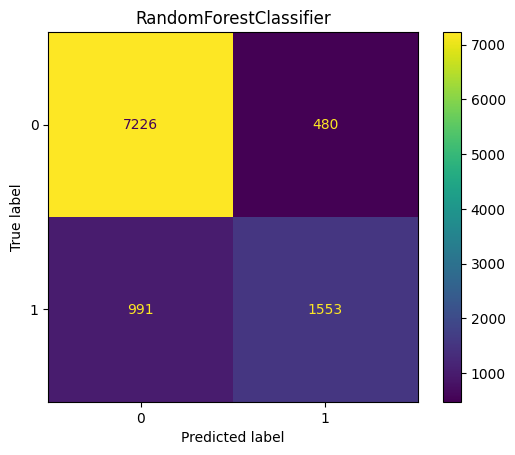

********************************************************************** 

accuracy_score = 0.8654634146341463
confusion_matrix = 
[[7339  367]
 [1012 1532]]
classification_report = 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7706
           1       0.81      0.60      0.69      2544

    accuracy                           0.87     10250
   macro avg       0.84      0.78      0.80     10250
weighted avg       0.86      0.87      0.86     10250



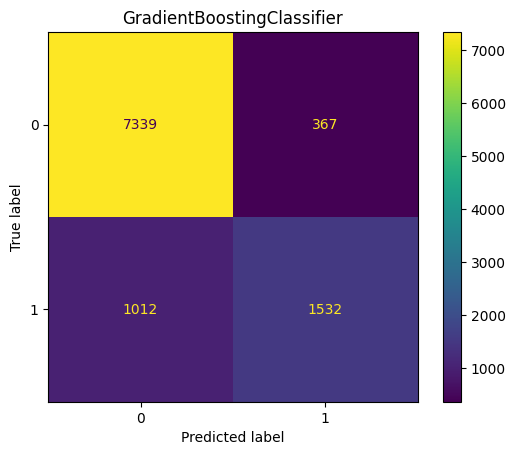

********************************************************************** 

accuracy_score = 0.8595121951219512
confusion_matrix = 
[[7286  420]
 [1020 1524]]
classification_report = 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7706
           1       0.78      0.60      0.68      2544

    accuracy                           0.86     10250
   macro avg       0.83      0.77      0.79     10250
weighted avg       0.85      0.86      0.85     10250



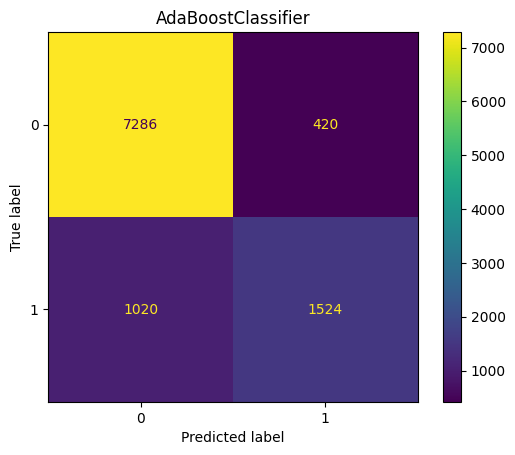

********************************************************************** 

accuracy_score = 0.8681951219512195
confusion_matrix = 
[[7233  473]
 [ 878 1666]]
classification_report = 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7706
           1       0.78      0.65      0.71      2544

    accuracy                           0.87     10250
   macro avg       0.84      0.80      0.81     10250
weighted avg       0.86      0.87      0.86     10250



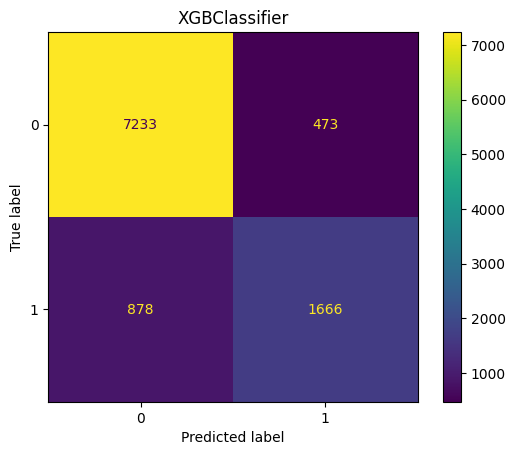

********************************************************************** 

accuracy_score = 0.8278048780487804
confusion_matrix = 
[[7000  706]
 [1059 1485]]
classification_report = 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7706
           1       0.68      0.58      0.63      2544

    accuracy                           0.83     10250
   macro avg       0.77      0.75      0.76     10250
weighted avg       0.82      0.83      0.82     10250



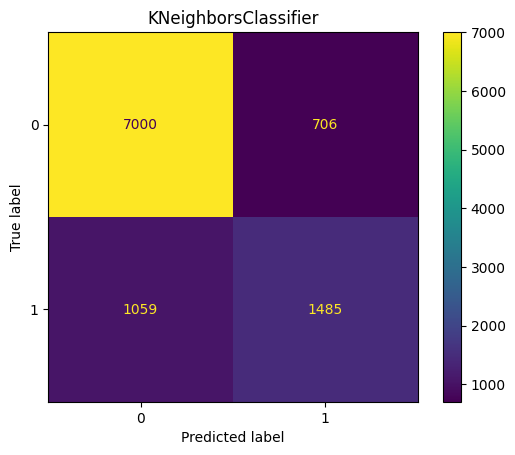

********************************************************************** 

accuracy_score = 0.8115121951219513
confusion_matrix = 
[[6745  961]
 [ 971 1573]]
classification_report = 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7706
           1       0.62      0.62      0.62      2544

    accuracy                           0.81     10250
   macro avg       0.75      0.75      0.75     10250
weighted avg       0.81      0.81      0.81     10250



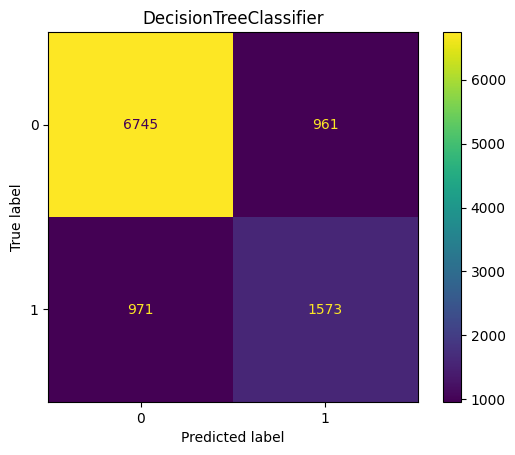

********************************************************************** 

accuracy_score = 0.8746341463414634
confusion_matrix = 
[[7320  386]
 [ 899 1645]]
classification_report = 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7706
           1       0.81      0.65      0.72      2544

    accuracy                           0.87     10250
   macro avg       0.85      0.80      0.82     10250
weighted avg       0.87      0.87      0.87     10250



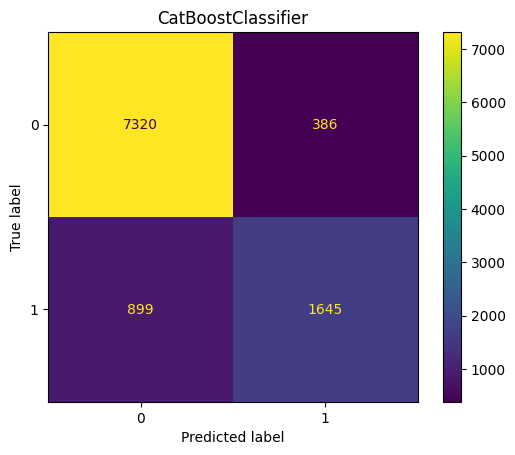

********************************************************************** 

accuracy_score = 0.8711219512195122
confusion_matrix = 
[[7286  420]
 [ 901 1643]]
classification_report = 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7706
           1       0.80      0.65      0.71      2544

    accuracy                           0.87     10250
   macro avg       0.84      0.80      0.82     10250
weighted avg       0.87      0.87      0.87     10250



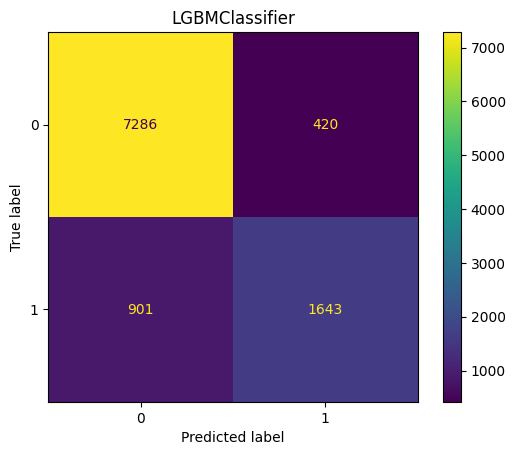

********************************************************************** 



,model,accuracy_score
0,RandomForestClassifier,0.856488
1,GradientBoostingClassifier,0.865463
2,AdaBoostClassifier,0.859512
3,XGBClassifier,0.868195
4,KNeighborsClassifier,0.827805
5,DecisionTreeClassifier,0.811512
6,CatBoostClassifier,0.874634
7,LGBMClassifier,0.871122


In [38]:
models = [rfc, gbc, adac, xgbc, knc, dtc, catc, lightc]

metrics_df = pd.DataFrame(columns = ['model', 'accuracy_score'])

for model in models:
    get_metrics(model, X_train, X_test, y_train, y_test)

metrics_df

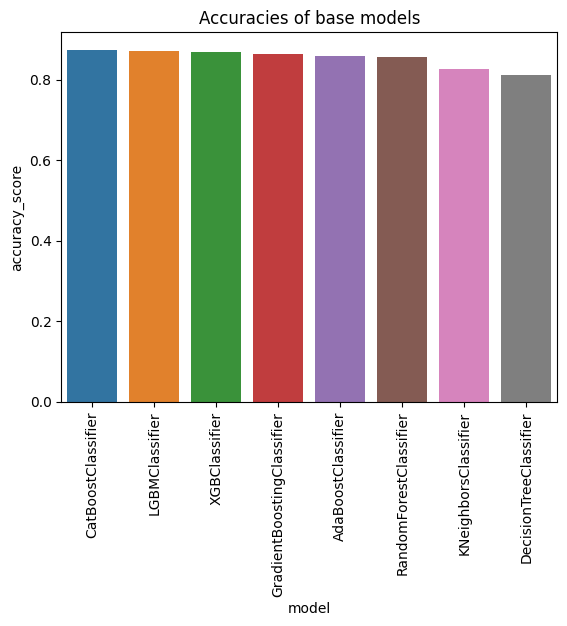

In [39]:
metrics_df = metrics_df.sort_values('accuracy_score', ascending=False)
sns.barplot(x = 'model', y = 'accuracy_score', data = metrics_df)
plt.title('Accuracies of base models')
plt.xticks(rotation = 90)
plt.show()

In [40]:
metrics_df

,model,accuracy_score
6,CatBoostClassifier,0.874634
7,LGBMClassifier,0.871122
3,XGBClassifier,0.868195
1,GradientBoostingClassifier,0.865463
2,AdaBoostClassifier,0.859512
0,RandomForestClassifier,0.856488
4,KNeighborsClassifier,0.827805
5,DecisionTreeClassifier,0.811512


### Hyperparameter tuning - Optuna

In [41]:
import optuna
from sklearn.model_selection import StratifiedKFold

In [42]:
def objective(trial):
    lgb_params = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate' : trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'max_depth' : trial.suggest_int('max_depth', 3, 10),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
        'subsample' : trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree' : trial.suggest_uniform('colsample_bytree', 0.5, 1)
        
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = seed)
    
    cv_score = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = LGBMClassifier(**lgb_params, verbose = -1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        cv_score.append(score)
    
    return np.mean(cv_score)
    
#study = optuna.create_study(direction = 'maximize')
#study.optimize(objective, n_trials = 100)

In [43]:
#study.best_params
#Best is trial 38 with value: 0.8745462936273924.

In [44]:
lgb_final_params = {'n_estimators': 620,
 'learning_rate': 0.08869224784029875,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 0.5999675348866855,
 'colsample_bytree': 0.7739186301868707}

In [45]:
def objective2(trial):
    cv_score = []
    cat_params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100)
    }
    
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = CatBoostClassifier(**cat_params, verbose = False)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        cv_score.append(score)
    
    return np.mean(cv_score)

#study2 = optuna.create_study(direction = 'maximize')
#study2.optimize(objective2,100)

In [46]:
#study2.best_params
# Best is trial 58 with value: 0.8742828661431249.

In [47]:
#cat_final_params = study2.best_params

In [48]:
cat_final_params = {'learning_rate': 0.052560129014759746, 'depth': 4, 'subsample': 0.6261928877290429, 'colsample_bylevel': 0.5879512788816506, 'min_data_in_leaf': 67}

In [49]:
def objective3(trial):
    cv_score = []
    xgb_params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0)
    }
    
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = XGBClassifier(**xgb_params, verbosity = 0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        cv_score.append(score)
    
    return np.mean(cv_score)

#study3 = optuna.create_study(direction = 'maximize')
#study3.optimize(objective3,100)

In [50]:
#study3.best_params

In [51]:
#xgb_best_params = study3.best_params

In [52]:
XGB_best_params = {'max_depth': 7,
 'learning_rate': 0.14444479389273004,
 'n_estimators': 74,
 'min_child_weight': 3,
 'gamma': 3.7615135073817854e-07,
 'subsample': 0.740882144147384,
 'colsample_bytree': 0.5575517044796386}

In [95]:
XGB_best_params = {'max_depth': 7,
                     'learning_rate': 0.14444479389273004,
                     'n_estimators': 74,
                     'min_child_weight': 3,
                     'gamma': 3.7615135073817854e-07,
                     'subsample': 0.740882144147384,
                     'colsample_bytree': 0.5575517044796386}

cat_final_params = {'learning_rate': 0.052560129014759746,
                    'depth': 4,
                    'subsample': 0.6261928877290429,
                    'colsample_bylevel': 0.5879512788816506,
                    'min_data_in_leaf': 67}

lgb_final_params = {'n_estimators': 620,
                     'learning_rate': 0.08869224784029875,
                     'max_depth': 3,
                     'min_child_weight': 10,
                     'subsample': 0.5999675348866855,
                     'colsample_bytree': 0.7739186301868707}

In [96]:
final_xgb = XGBClassifier(**XGB_best_params, verbosity = 0)
final_cat = CatBoostClassifier(**cat_final_params, verbose = False)
final_lgb = LGBMClassifier(**lgb_final_params, verbose = -1)

### Ensemble Voting Classifier

In [97]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = [('xgb', final_xgb), ('cat', final_cat), ('lgbm', final_lgb)], voting = 'hard', weights=[1, 1, 1])
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8730731707317073

In [56]:
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')

Accuracy = 0.8730731707317073


In [57]:
confusion_matrix(y_test, y_pred)

array([[7308,  398],
       [ 903, 1641]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7706
           1       0.80      0.65      0.72      2544

    accuracy                           0.87     10250
   macro avg       0.85      0.80      0.82     10250
weighted avg       0.87      0.87      0.87     10250



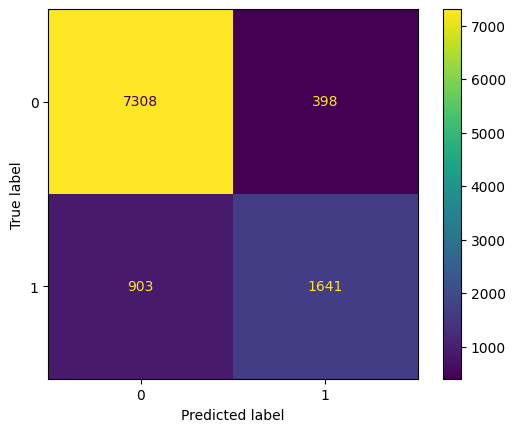

In [59]:
plot_confusion_matrix(vc, X_test, y_test)

In [98]:
final_preds = vc.predict(df_test)

In [102]:
submission = pd.DataFrame()

submission['prediction'] = final_preds
submission.to_csv('IncomePredictionSubmission.csv', index = False)

In [112]:
# trying out with neural network

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=33, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs= 20, batch_size=50, validation_data=(X_test, y_test))

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Predict on X_test
y_pred = model.predict(X_test)
y_pred_class = np.round(y_pred)

Epoch 1/20
547/547 [==============================] - 3s 2ms/step - loss: 0.3516 - accuracy: 0.8330 - val_loss: 0.3256 - val_accuracy: 0.8490
Epoch 2/20
547/547 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.8482 - val_loss: 0.3220 - val_accuracy: 0.8484
Epoch 3/20
547/547 [==============================] - 1s 2ms/step - loss: 0.3165 - accuracy: 0.8501 - val_loss: 0.3249 - val_accuracy: 0.8506
Epoch 4/20
547/547 [==============================] - 1s 2ms/step - loss: 0.3128 - accuracy: 0.8525 - val_loss: 0.3220 - val_accuracy: 0.8500
Epoch 5/20
547/547 [==============================] - 1s 3ms/step - loss: 0.3104 - accuracy: 0.8541 - val_loss: 0.3264 - val_accuracy: 0.8516
Epoch 6/20
547/547 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.8549 - val_loss: 0.3211 - val_accuracy: 0.8537
Epoch 7/20
547/547 [==============================] - 1s 2ms/step - loss: 0.3068 - accuracy: 0.8550 - val_loss: 0.3220 - val_accuracy: 0.8532
Epoch 

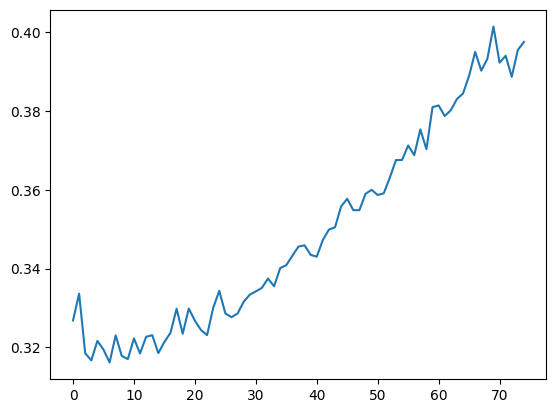

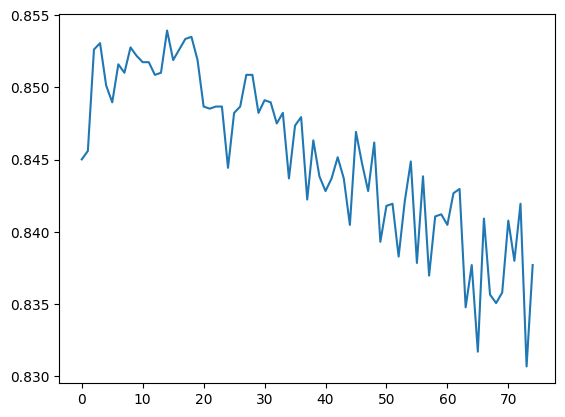

In [109]:
plt.plot(val_loss)
plt.show()
plt.plot(val_acc)
plt.show()

In [126]:
# submission 2 
y_pred2 = model.predict(df_test)
y_pred2 = (np.round(y_pred2))

df_test_pred = pd.DataFrame(y_pred2)
df_test_pred = df_test_backup.astype(int)

458/458 [==============================] - 1s 2ms/step
